## **Details**
<b>Task</b> - Predicting optimum number if clusters for the Iris dataset<br/>
<b>Author</b> - Suraj Krishnamoorthy (Data Science and Business Analysis Intern)

### 1. Import required libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

### 2. Import dataset from URL

In [2]:
iris_dataset = datasets.load_iris()
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3. Find optimum number of clusters

We will use the elbow graph to find the optimal number of clusters

In [4]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss_arr = []

for i in range(1, 11):
    cluster_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    cluster_model.fit(x)
    wcss_arr.append(cluster_model.inertia_)

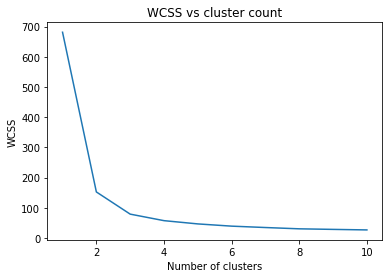

In [5]:
plt.plot(range(1, 11), wcss_arr)
plt.title('WCSS vs cluster count')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As seen in the above graph, the 'elbow' of the graph is at cluster count <b>3</b>. Beyond that, WCSS does not decease significantly.

### 4. Creating the K-Means classifier 

In [6]:
optimal_cluster_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
output_kmeans = optimal_cluster_model.fit_predict(x)

### 5. Visualize the cluster

In [7]:
optimal_cluster_model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

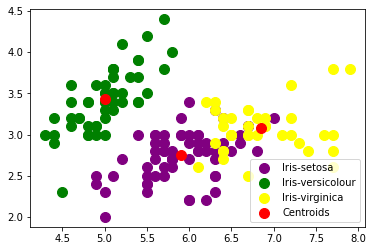

In [8]:
plt.scatter(x[output_kmeans == 0, 0], x[output_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[output_kmeans == 1, 0], x[output_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[output_kmeans == 2, 0], x[output_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(optimal_cluster_model.cluster_centers_[:, 0], optimal_cluster_model.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()

## Task Completed